In [222]:
import csv
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, classification_report, roc_auc_score
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [223]:
raw_data_RIGHT = pd.read_csv('RIGHT.csv')
raw_data_LEFT = pd.read_csv('LEFT.csv')
raw_data_UP = pd.read_csv('UP.csv')
raw_data_DOWN = pd.read_csv('DOWN.csv')


In [224]:
raw_data_UP.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,0,0.000248,0.047404,-0.015414,-0.002540,-0.008496,-0.016469,-0.028687,-0.017898,-0.011372,...,-0.019127,-0.032841,-0.006237,-0.014011,0.025445,0.035141,0.011296,-0.003508,-0.025931,-0.000754
1,1,0.000687,0.046114,-0.016430,-0.002342,-0.006581,-0.017822,-0.027793,-0.016982,-0.010286,...,-0.017527,-0.033965,-0.009548,-0.015372,0.026154,0.033807,0.009588,-0.003225,-0.026502,-0.002211
2,2,0.001141,0.044731,-0.017446,-0.002164,-0.004654,-0.019175,-0.026903,-0.016000,-0.009133,...,-0.015980,-0.035117,-0.012831,-0.016730,0.026827,0.032438,0.007887,-0.002977,-0.027074,-0.003681
3,3,0.001606,0.043254,-0.018460,-0.002008,-0.002724,-0.020521,-0.026021,-0.014947,-0.007911,...,-0.014492,-0.036292,-0.016068,-0.018079,0.027458,0.031036,0.006199,-0.002768,-0.027646,-0.005161
4,4,0.002083,0.041681,-0.019466,-0.001877,-0.000795,-0.021855,-0.025152,-0.013820,-0.006621,...,-0.013070,-0.037484,-0.019242,-0.019411,0.028036,0.029606,0.004530,-0.002601,-0.028214,-0.006647


In [225]:
raw_data_DOWN.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,0,0.126787,-0.059156,0.083403,0.090140,0.114877,0.050987,0.028857,0.004028,0.169297,...,-0.012813,-0.005454,0.059254,0.010330,0.018552,-0.038891,0.021228,-0.039240,-0.047630,0.075032
1,1,0.124796,-0.059137,0.081373,0.091103,0.110954,0.051344,0.030621,0.004317,0.163263,...,-0.012042,-0.004425,0.067091,0.007670,0.020931,-0.039640,0.021545,-0.038119,-0.044595,0.074921
2,2,0.122742,-0.059131,0.079289,0.092044,0.107078,0.051620,0.032404,0.004578,0.157172,...,-0.011334,-0.003314,0.074898,0.005047,0.023165,-0.040459,0.021942,-0.037019,-0.041438,0.074833
3,3,0.120622,-0.059137,0.077160,0.092946,0.103265,0.051802,0.034196,0.004806,0.151045,...,-0.010702,-0.002119,0.082638,0.002471,0.025227,-0.041344,0.022416,-0.035948,-0.038160,0.074771
4,4,0.118434,-0.059157,0.074996,0.093793,0.099531,0.051881,0.035988,0.004995,0.144906,...,-0.010158,-0.000837,0.090273,-0.000050,0.027096,-0.042294,0.022963,-0.034910,-0.034764,0.074741


In [226]:
up_down_data = pd.concat([raw_data_UP.iloc[:, 1:], raw_data_DOWN.iloc[:, 1:]], axis=1)
print(up_down_data.shape)
up_down_data.head()

(1000, 60)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000248,0.047404,-0.015414,-0.002540,-0.008496,-0.016469,-0.028687,-0.017898,-0.011372,-0.032876,...,-0.012813,-0.005454,0.059254,0.010330,0.018552,-0.038891,0.021228,-0.039240,-0.047630,0.075032
1,0.000687,0.046114,-0.016430,-0.002342,-0.006581,-0.017822,-0.027793,-0.016982,-0.010286,-0.033555,...,-0.012042,-0.004425,0.067091,0.007670,0.020931,-0.039640,0.021545,-0.038119,-0.044595,0.074921
2,0.001141,0.044731,-0.017446,-0.002164,-0.004654,-0.019175,-0.026903,-0.016000,-0.009133,-0.034247,...,-0.011334,-0.003314,0.074898,0.005047,0.023165,-0.040459,0.021942,-0.037019,-0.041438,0.074833
3,0.001606,0.043254,-0.018460,-0.002008,-0.002724,-0.020521,-0.026021,-0.014947,-0.007911,-0.034947,...,-0.010702,-0.002119,0.082638,0.002471,0.025227,-0.041344,0.022416,-0.035948,-0.038160,0.074771
4,0.002083,0.041681,-0.019466,-0.001877,-0.000795,-0.021855,-0.025152,-0.013820,-0.006621,-0.035644,...,-0.010158,-0.000837,0.090273,-0.000050,0.027096,-0.042294,0.022963,-0.034910,-0.034764,0.074741


In [227]:
y = np.append(np.ones(30), np.zeros(30))
print(y.shape)

(60,)


In [249]:
up_down_data.isnull().sum().sum()

np.int64(0)

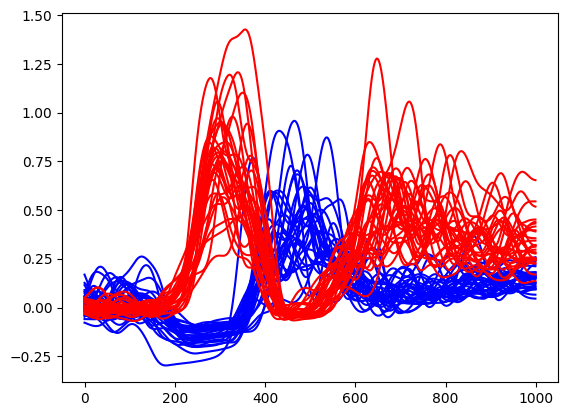

In [228]:
plt.plot(up_down_data.iloc[:, y==0], 'b')
plt.plot(up_down_data.iloc[:, y==1], 'r')
#plt.legend(['Down', 'Up'])


In [229]:
x_train, x_test, y_train, y_test = train_test_split(up_down_data[200:400].T, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape)

(42, 200)


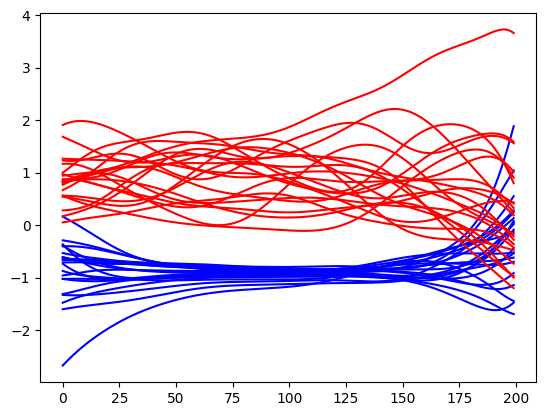

In [230]:
plt.plot(x_train[y_train==0].T, 'b')
plt.plot(x_train[y_train==1].T, 'r');

1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

ROC AUC: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
Accuracy: 1.0


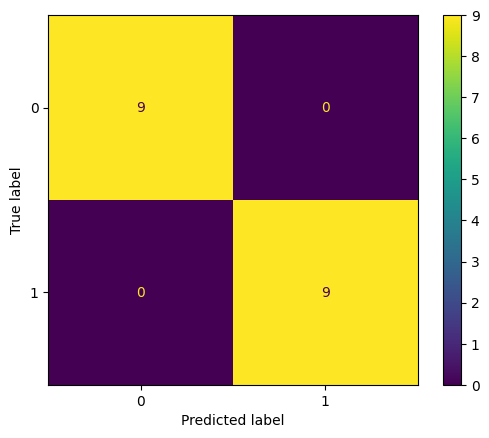

In [231]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))
print(classification_report(y_test, knn.predict(x_test)))
y_pred_knn = knn.predict(x_test)
print('ROC AUC:', roc_auc_score(y_test, y_pred_knn))
print('Precision:', precision_score(y_test, y_pred_knn))
print('Recall:', recall_score(y_test, y_pred_knn))
print('F1:', f1_score(y_test, y_pred_knn))
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
display = ConfusionMatrixDisplay(conf_mat_knn)
display.plot()



1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

ROC AUC: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
Accuracy: 1.0


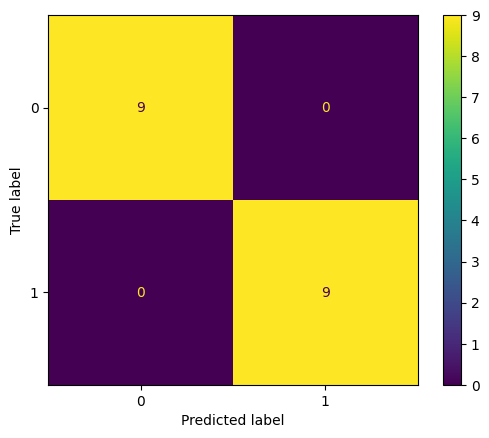

In [232]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
print(svm.score(x_test, y_test))
print(classification_report(y_test, svm.predict(x_test)))

print('ROC AUC:', roc_auc_score(y_test, y_pred_svm))
print('Precision:', precision_score(y_test, y_pred_svm))
print('Recall:', recall_score(y_test, y_pred_svm))
print('F1:', f1_score(y_test, y_pred_svm))
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm)}')
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
display = ConfusionMatrixDisplay(conf_mat_svm)
display.plot()



0.8333333333333334
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.82         9
         1.0       0.80      0.89      0.84         9

    accuracy                           0.83        18
   macro avg       0.84      0.83      0.83        18
weighted avg       0.84      0.83      0.83        18

ROC AUC: 0.8333333333333334
Precision: 0.8
Recall: 0.8888888888888888
F1: 0.8421052631578947
Accuracy: 0.8333333333333334


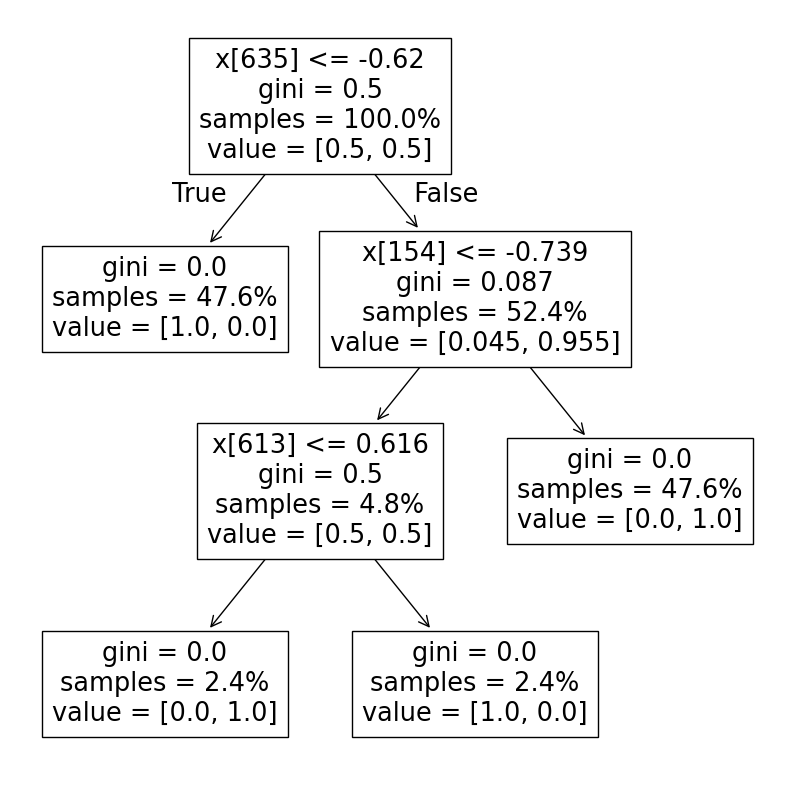

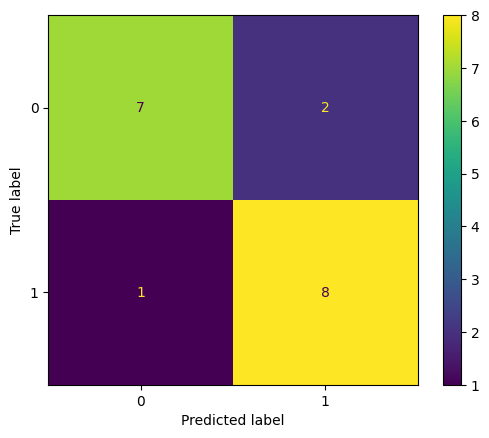

In [246]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print(dt.score(x_test, y_test))
print(classification_report(y_test, y_pred_dt))

print('ROC AUC:', roc_auc_score(y_test, y_pred_dt))
print('Precision:', precision_score(y_test, y_pred_dt))
print('Recall:', recall_score(y_test, y_pred_dt))
print('F1:', f1_score(y_test, y_pred_dt))
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt)}')

plt.figure(figsize = (10,10))
tree.plot_tree(dt, proportion= True)
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
display = ConfusionMatrixDisplay(conf_mat_dt)
display.plot()

0.7777777777777778
[[7 2]
 [2 7]]
              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78         9
         1.0       0.78      0.78      0.78         9

    accuracy                           0.78        18
   macro avg       0.78      0.78      0.78        18
weighted avg       0.78      0.78      0.78        18

ROC AUC: 0.7777777777777777
Precision: 0.7777777777777778
Recall: 0.7777777777777778
F1: 0.7777777777777778
Accuracy: 0.7777777777777778


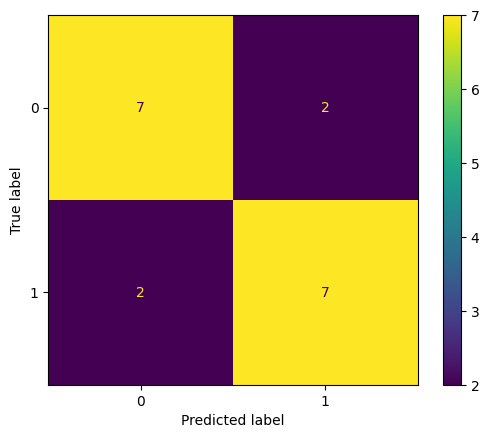

In [247]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
y_pred_logistic = logistic.predict(x_test)
print(logistic.score(x_test, y_test))
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

print('ROC AUC:', roc_auc_score(y_test, y_pred_logistic))
print('Precision:', precision_score(y_test, y_pred_logistic))
print('Recall:', recall_score(y_test, y_pred_logistic))
print('F1:', f1_score(y_test, y_pred_logistic))
print(f'Accuracy: {accuracy_score(y_test, y_pred_logistic)}')
conf_mat_log = confusion_matrix(y_test, y_pred_logistic)
display = ConfusionMatrixDisplay(conf_mat_log)
display.plot();


In [235]:
print(raw_data_LEFT.shape)

(1000, 31)


In [236]:
left_right_data = pd.concat([raw_data_LEFT.iloc[:, 1:], raw_data_RIGHT.iloc[:, 1:]], axis=1)
print(left_right_data.shape)

(1000, 60)


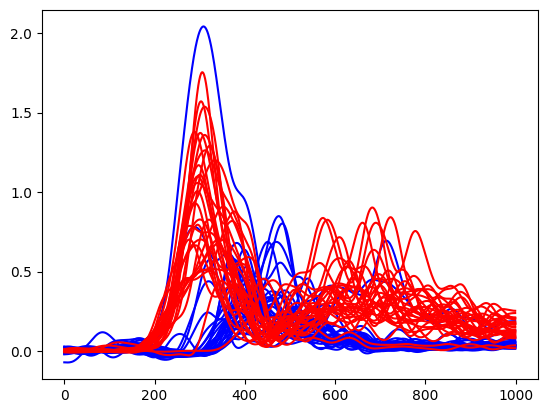

In [237]:
# drop_po = ((y==0) & (np.max(np.array(left_right_data), axis=0) <= 2)) | (y==1)
# left_right_data_drop = left_right_data.iloc[:, drop_po]
# y_drop = y[drop_po]
plt.plot(left_right_data.iloc[:, y==0], 'b')
plt.plot(left_right_data.iloc[:, y==1], 'r');

In [238]:
x_train, x_test, y_train, y_test = train_test_split(left_right_data.T, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape)

(42, 1000)


0.8888888888888888
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89         9
         1.0       0.89      0.89      0.89         9

    accuracy                           0.89        18
   macro avg       0.89      0.89      0.89        18
weighted avg       0.89      0.89      0.89        18

ROC AUC: 0.8888888888888888
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1: 0.8888888888888888


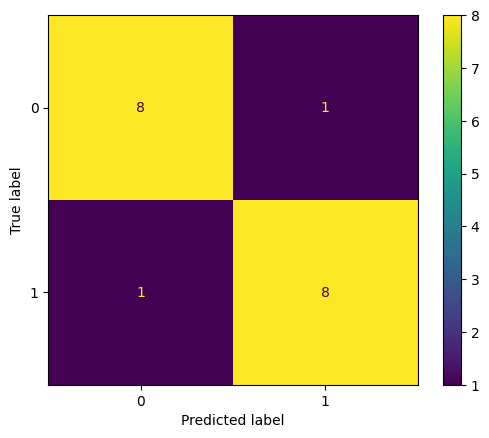

In [239]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))
print(classification_report(y_test, knn.predict(x_test)))
y_pred_knn = knn.predict(x_test)

print('ROC AUC:', roc_auc_score(y_test, y_pred_knn))
print('Precision:', precision_score(y_test, y_pred_knn))
print('Recall:', recall_score(y_test, y_pred_knn))
print('F1:', f1_score(y_test, y_pred_knn))
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
display = ConfusionMatrixDisplay(conf_mat_knn)
display.plot();


0.8888888888888888
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89         9
         1.0       0.89      0.89      0.89         9

    accuracy                           0.89        18
   macro avg       0.89      0.89      0.89        18
weighted avg       0.89      0.89      0.89        18

ROC AUC: 0.8888888888888888
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1: 0.8888888888888888


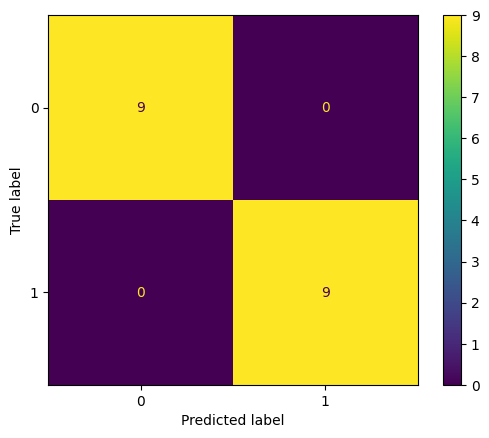

In [240]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
print(svm.score(x_test, y_test))
print(classification_report(y_test, svm.predict(x_test)))

print('ROC AUC:', roc_auc_score(y_test, y_pred_svm))
print('Precision:', precision_score(y_test, y_pred_svm))
print('Recall:', recall_score(y_test, y_pred_svm))
print('F1:', f1_score(y_test, y_pred_svm))
conf_mat_svc = confusion_matrix(y_test, y_pred_svm)
display = ConfusionMatrixDisplay(conf_mat_svm)
display.plot();


0.7777777777777778
              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78         9
         1.0       0.78      0.78      0.78         9

    accuracy                           0.78        18
   macro avg       0.78      0.78      0.78        18
weighted avg       0.78      0.78      0.78        18

ROC AUC: 0.7777777777777777
Precision: 0.7777777777777778
Recall: 0.7777777777777778
F1: 0.7777777777777778


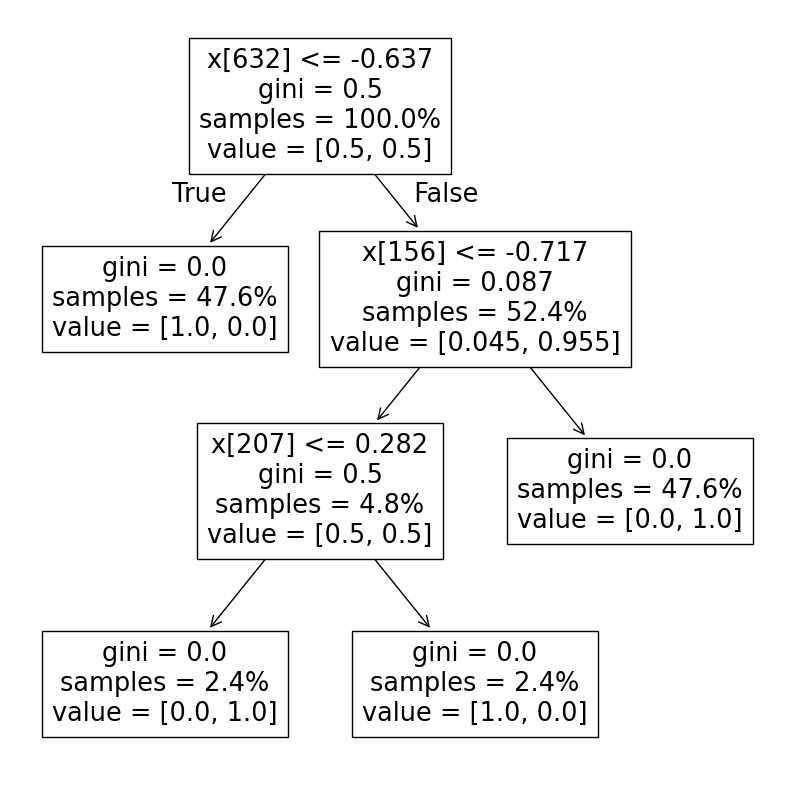

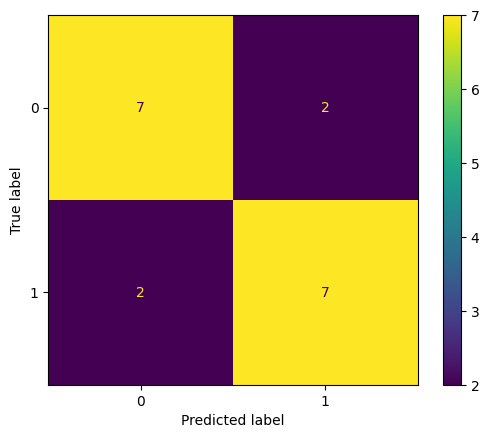

In [241]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print(dt.score(x_test, y_test))
print(classification_report(y_test, y_pred_dt))

print('ROC AUC:', roc_auc_score(y_test, y_pred_dt))
print('Precision:', precision_score(y_test, y_pred_dt))
print('Recall:', recall_score(y_test, y_pred_dt))
print('F1:', f1_score(y_test, y_pred_dt))
plt.figure(figsize = (10,10))
tree.plot_tree(dt, proportion= True)
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
display = ConfusionMatrixDisplay(conf_mat_dt)
display.plot();


0.7777777777777778
[[7 2]
 [2 7]]
              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78         9
         1.0       0.78      0.78      0.78         9

    accuracy                           0.78        18
   macro avg       0.78      0.78      0.78        18
weighted avg       0.78      0.78      0.78        18

ROC AUC: 0.7777777777777777
Precision: 0.7777777777777778
Recall: 0.7777777777777778
F1: 0.7777777777777778


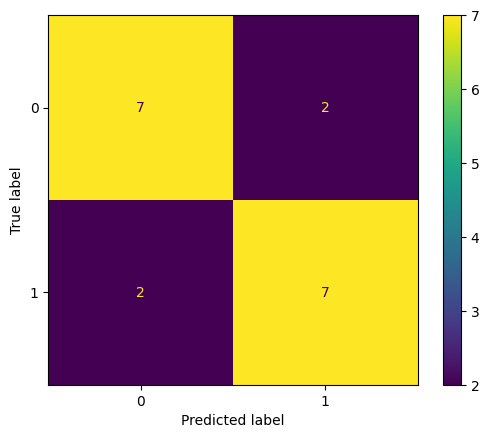

In [242]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
y_pred_logistic = logistic.predict(x_test)
print(logistic.score(x_test, y_test))
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

print('ROC AUC:', roc_auc_score(y_test, y_pred_logistic))
print('Precision:', precision_score(y_test, y_pred_logistic))
print('Recall:', recall_score(y_test, y_pred_logistic))
print('F1:', f1_score(y_test, y_pred_logistic))
conf_mat_log = confusion_matrix(y_test, y_pred_logistic)
display = ConfusionMatrixDisplay(conf_mat_log)
display.plot();


In [243]:
conf_mat_model_name = confusion_matrix(y_test, y_preds)
display = ConfusionMatrixDisplay(conf_mat_model_name)
display.plot()


NameError: name 'y_preds' is not defined